<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/CYCLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fitparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68214 sha256=b07cedb0ee8e08b1d8fa8344c18144d6084e5612d7c9ee9847c7b05a3c264449
  Stored in directory: /root/.cache/pip/wheels/81/67/7b/77a2f8ba348bafbbad6262a80bc51be27b2f9fccbaefc74671
Successfully built fitparse


In [258]:
import fitparse
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns
import folium

  Currently working on the second link! (It is a short ride)
Goal is to get HR,spd,cad,elv,dist,time maybe some other info


Later add other .fit files to increase the data pool (investigate separately)

* https://www.strava.com/activities/9464439796/analysis

* https://www.strava.com/activities/9801158933



In [259]:
fit_file_path ="/content/drive/MyDrive/Colab Notebooks/activities/04082022.fit"

# Create empty dict to store data
tablecontent = {}
# Create a FitFile object
fitfile = fitparse.FitFile(fit_file_path)
UNIT = []
for r in fitfile.get_messages("record"):
  for d in r:
    dataname = d.name
    datavalue = d.value
    dataunit = d.units
    if dataname in tablecontent:
      tablecontent[dataname].append(datavalue)
    else:
      tablecontent[dataname] = [datavalue]
      UNIT.append(dataunit)

In [260]:
newcontent = list(zip(tablecontent.keys(),UNIT))
newcontent

[('altitude', 'm'),
 ('cadence', 'rpm'),
 ('distance', 'm'),
 ('enhanced_altitude', 'm'),
 ('enhanced_speed', 'm/s'),
 ('heart_rate', 'bpm'),
 ('position_lat', 'semicircles'),
 ('position_long', 'semicircles'),
 ('power', 'watts'),
 ('speed', 'm/s'),
 ('temperature', 'C'),
 ('timestamp', None)]

Units are not familiar to eye so it needs to be converted! (*Later*)

In [261]:
#semicircles to something meaningful:
def loc_converter(semi_lat,semi_lon):
  lat = (semi_lat / 2**31) * 180
  lon = (semi_lon/2**31)*180
  return lat, lon

In [302]:
df1 = pd.DataFrame.from_dict(tablecontent, orient='index',).transpose()

In [303]:
df1["distance"] = df1["distance"]/1000 #convert distance to km
df2 = df1.drop(columns = ["enhanced_altitude","enhanced_speed","power","enhanced_altitude","position_lat","position_long","temperature","timestamp"],axis = 1).astype(float) #drop these
new_location = loc_converter(df1["position_lat"],df1["position_long"])
df1["position_lat"] = new_location[0]
df1["position_long"] = new_location[1]
df1["speed"] = df1["speed"]*3.6 #m/s to km/h


<Axes: >

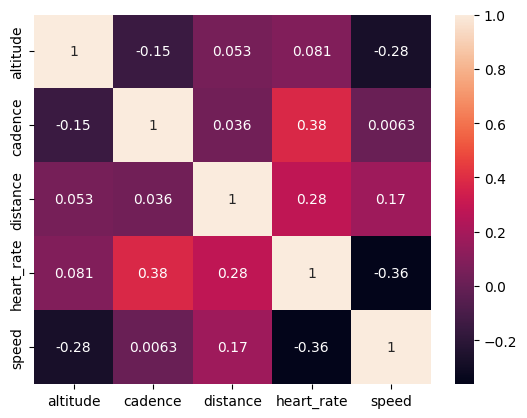

In [308]:
cor = df2.corr()
sns.heatmap(cor, annot=True)

,altitude,cadence,distance,heart_rate,speed
altitude,1.000000,-0.151113,0.053070,0.081103,-0.276271
cadence,-0.151113,1.000000,0.036081,0.380893,0.006310
distance,0.053070,0.036081,1.000000,0.280020,0.172012
heart_rate,0.081103,0.380893,0.280020,1.000000,-0.361543
speed,-0.276271,0.006310,0.172012,-0.361543,1.000000


In [301]:
df2.dtypes

altitude      object
cadence       object
distance      object
heart_rate    object
speed         object
dtype: object

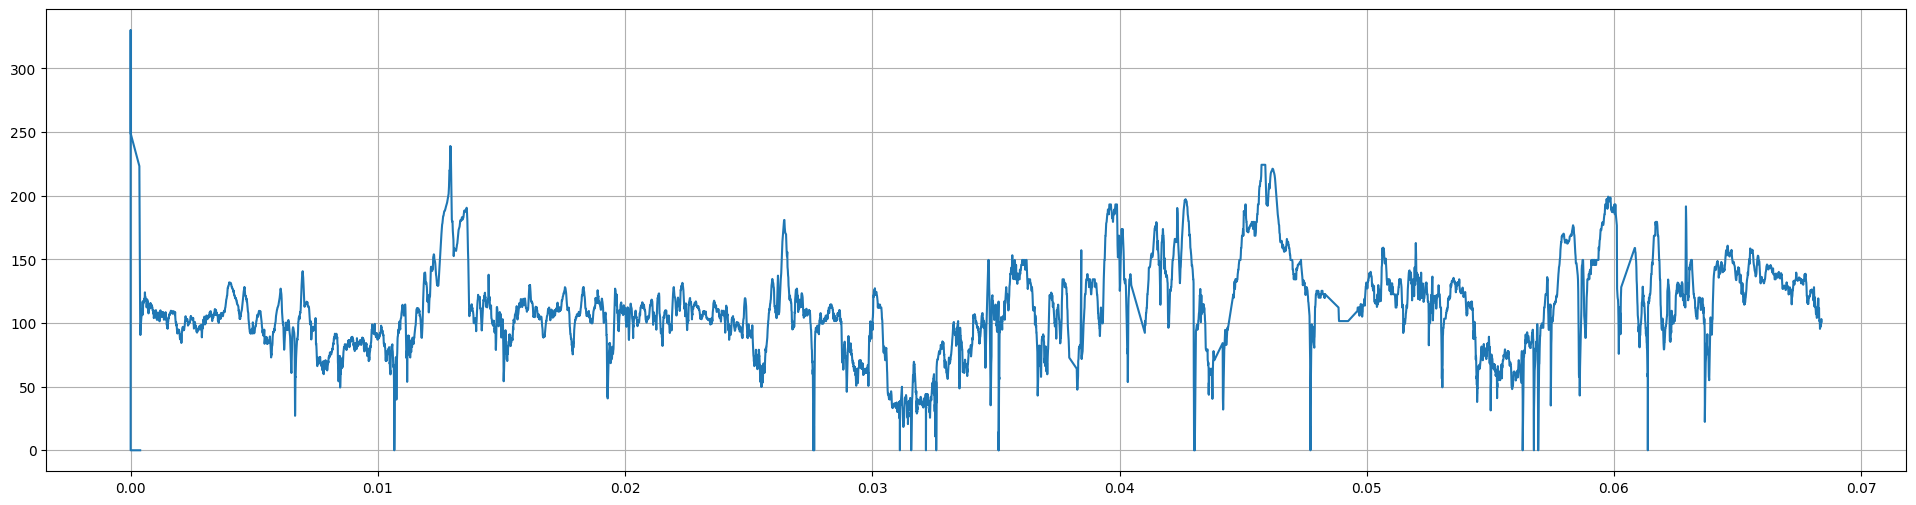

In [264]:
#First let's take a look at distance vs speed graph
plt.figure(figsize=(24, 6))
plot(df1['distance']/1000,df1['speed']*3.6)
grid(True)

It is clear that speed is in m/s and distance is in m.


In [218]:
# Sample semicircle values and directions
semicircles_latitude = 488680652  # Replace with your actual value
semicircles_longitude = 346939009  # Replace with your actual value
latitude_direction = 'N'  # Replace with 'N' for North or 'S' for South
longitude_direction = 'E'  # Replace with 'E' for East or 'W' for West

# Convert semicircles to degrees
latitude = (semicircles_latitude / 2**31) * 180
if latitude_direction == 'S':
    latitude = -latitude  # Invert if in the Southern hemisphere

longitude = (semicircles_longitude / 2**31) * 180
if longitude_direction == 'W':
    longitude = -longitude  # Invert if in the Western hemisphere

print(f"Latitude: {latitude}, Longitude: {longitude}")


Latitude: 40.96073906868696, Longitude: 29.08009179867804


In [255]:
df1

,altitude,cadence,distance,heart_rate,position_lat,position_long,speed,temperature,timestamp
0,34.6,73,0.000386,143,40.960739,29.080092,0.0,22,2022-08-04 01:41:49
1,34.6,72,0.0,143,40.960739,29.080092,0.0,22,2022-08-04 01:41:50
2,34.2,72,0.0,143,40.960739,29.080092,0.0,22,2022-08-04 01:41:51
3,34.6,72,0.0,142,40.960739,29.080092,0.0,22,2022-08-04 01:41:52
4,33.8,72,0.0,142,40.960739,29.080092,0.0,22,2022-08-04 01:41:53
...,...,...,...,...,...,...,...,...,...
8920,14.6,67,0.068364,158,40.952678,29.090436,27.9216,23,2022-08-04 04:35:46
8921,14.8,67,0.068372,158,40.952637,29.090513,27.0144,23,2022-08-04 04:35:47
8922,14.8,67,0.06838,158,40.952597,29.090591,28.2924,23,2022-08-04 04:35:48
8923,14.8,67,0.068388,158,40.952562,29.090674,28.6344,23,2022-08-04 04:35:49


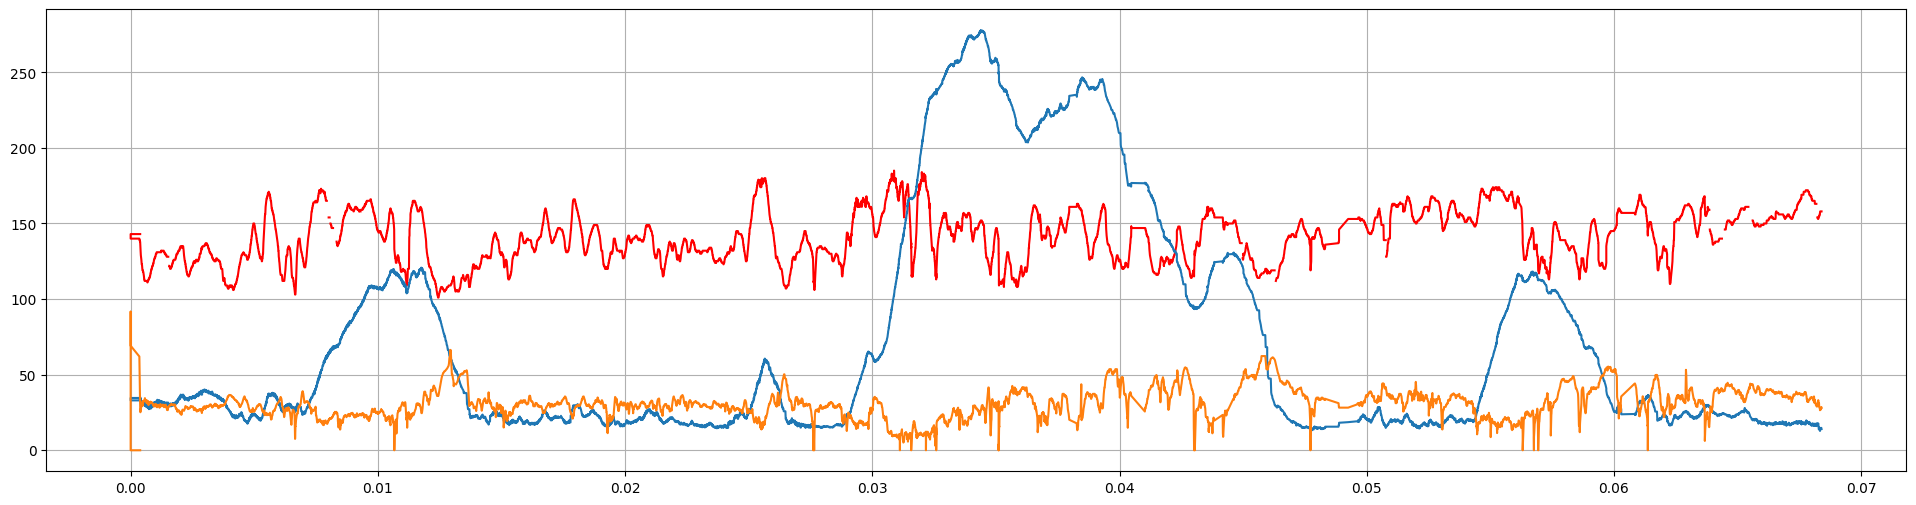

In [254]:
figure(figsize=(24,6))
plot(df1["distance"],df1["heart_rate"],c='r')
plot(df1["distance"],df1["altitude"])
plot(df1['distance'],df1['speed'])
grid(True)

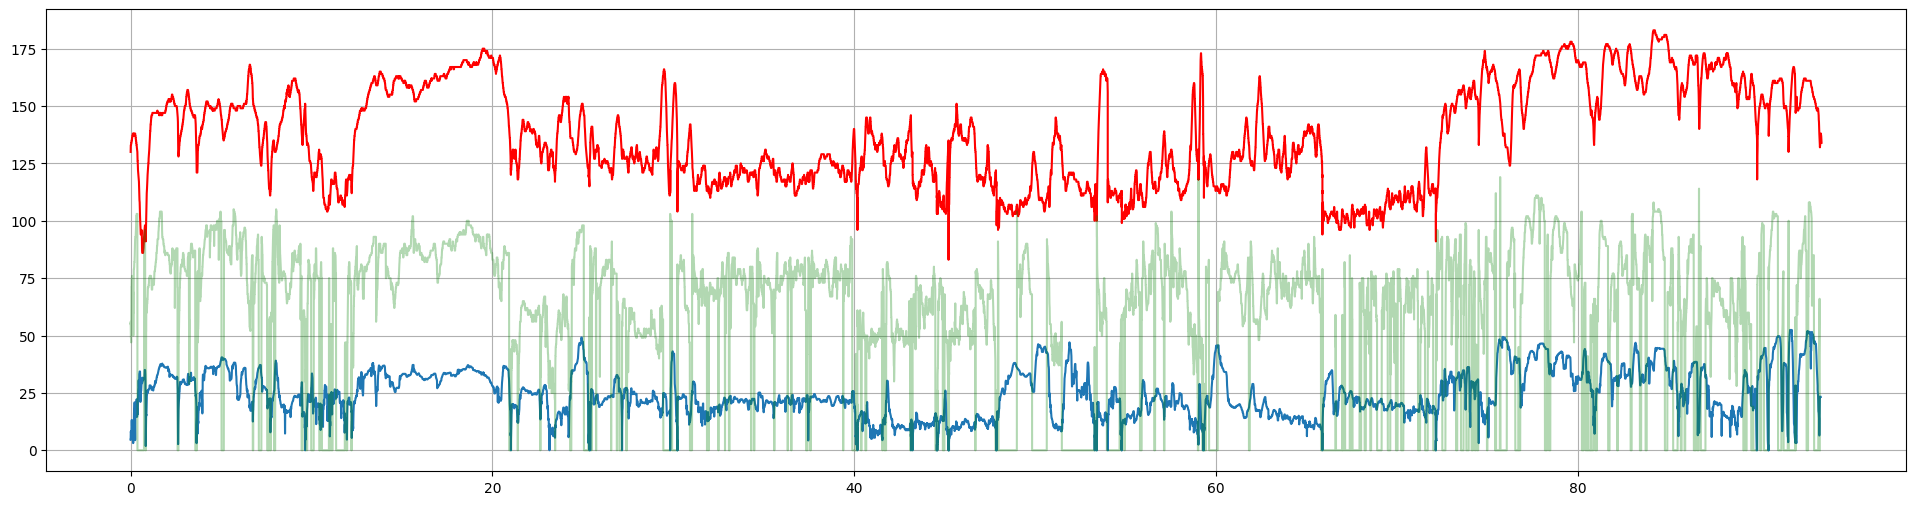

In [51]:
figure(figsize=(24,6))
plot(df1["distance"]/1000,df1["speed"]*3.6)
plot(df1["distance"]/1000,df1["heart_rate"],c='r')
plot(df1["distance"]/1000,df1["cadence"],c='g',alpha = 0.3)
grid(True)

In [251]:
import folium

# Replace with your actual lists of latitude and longitude coordinates
your_latitude_list = df1["position_lat"].dropna()
your_longitude_list = df1["position_long"].dropna()

# Create a map centered at the first coordinate in your list
initial_coordinate = (your_latitude_list[0], your_longitude_list[0])
m = folium.Map(location=initial_coordinate, zoom_start=20)  # Adjust the zoom level as needed

# Create a polyline from your list of coordinates
route = folium.PolyLine(locations=list(zip(your_latitude_list, your_longitude_list)), color='blue')

# Add the polyline to the map
route.add_to(m)

# Save the map as an HTML file
m.save('bike_route_map.html')
